In [5]:
import pandas as pd
df = pd.read_csv('../01_Raw_Data/bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
answer_counts = df['y'].value_counts()
answer_counts


y
no     36548
yes     4640
Name: count, dtype: int64

C:\Users\alyon\AppData\Local\Temp\ipykernel_35632\3590884005.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df.groupby(['month', 'y']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

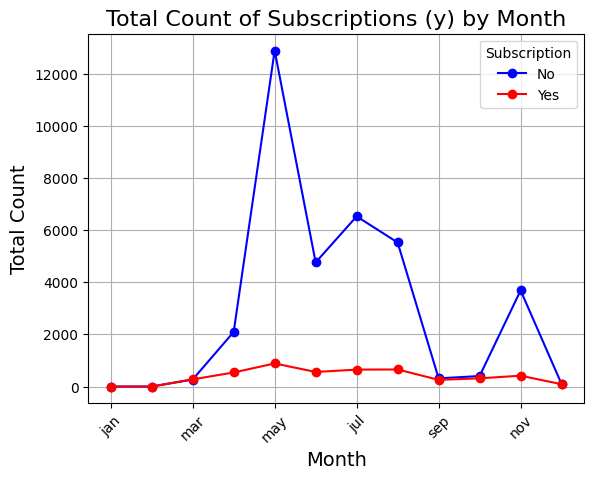

In [18]:
import matplotlib.pyplot as plt

df = pd.read_csv('../01_Raw_Data/bank-additional-full.csv', sep=';')

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

monthly_counts = df.groupby(['month', 'y']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', color=['blue', 'red'])
plt.title('Total Count of Subscriptions (y) by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Subscription', labels=['No', 'Yes'])

plt.show()

In [ ]:
# important note!!! the dataset has no identification of the actual calendar date!!! so it can lead to significant problems with modelling outcome!

In [ ]:
summary = df.describe()
summary = summary.drop(['count','25%', '50%', '75%'])
summary = summary.style.format("{:.0f}")
summary

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,40,258,3,962,0,0,94,-41,4,5167
std,10,259,3,187,0,2,1,5,2,72
min,17,0,1,0,0,-3,92,-51,1,4964
max,98,4918,56,999,7,1,95,-27,5,5228


In [ ]:
# !!!!! there's a problem with "pdays" column - incorrect data with 999 for all rows present

In [ ]:
# Calculate the sum of the 'duration' column

duration_sum = df['duration'].sum()
print("Total sum of the 'duration' column:", duration_sum)

Total sum of the 'duration' column: 10638243


In [ ]:
# Definition of age groups and count of 'yes' and 'no' in each group + % of positive conversions

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_counts = pd.crosstab(df['age_group'], df['y'])

age_group_counts.loc['Total'] = age_group_counts.sum()
age_group_counts['Total'] = age_group_counts.sum(axis=1)
age_group_counts['Yes (%)'] = (age_group_counts['yes'] / age_group_counts['Total']) * 100
age_group_counts['Yes (%)'] = age_group_counts['Yes (%)'].astype(int)
age_group_counts

y,no,yes,Total,Yes (%)
age_group,,,,
10-20,41,34,75,45
20-30,4706,888,5594,15
30-40,15223,1715,16938,10
40-50,9692,834,10526,7
50-60,6165,697,6862,10
60-70,473,251,724,34
70-80,175,144,319,45
80-90,68,72,140,51
90-100,5,5,10,50


In [16]:
# Definition of professional groups and count of 'yes' and 'no' in each group + % of positive conversions

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

all_feature_counts = {}

for column in categorical_columns:
    feature_counts = pd.crosstab(df[column], df['y'])
    feature_counts.loc['Total'] = feature_counts.sum()
    feature_counts['Total'] = feature_counts.sum(axis=1)
    feature_counts['Yes (%)'] = (feature_counts['yes'] / feature_counts['Total']) * 100
    feature_counts['Yes (%)'] = feature_counts['Yes (%)'].astype(int)
    all_feature_counts[column] = feature_counts

for column, result in all_feature_counts.items():
    print(f"Feature: {column}")
    display(result)
    print("\n")
    

Feature: job


y,no,yes,Total,Yes (%)
job,,,,
admin.,9070,1352,10422,12
blue-collar,8616,638,9254,6
entrepreneur,1332,124,1456,8
housemaid,954,106,1060,10
management,2596,328,2924,11
retired,1286,434,1720,25
self-employed,1272,149,1421,10
services,3646,323,3969,8
student,600,275,875,31




Feature: marital


y,no,yes,Total,Yes (%)
marital,,,,
divorced,4136,476,4612,10
married,22396,2532,24928,10
single,9948,1620,11568,14
unknown,68,12,80,15
Total,36548,4640,41188,11




Feature: education


y,no,yes,Total,Yes (%)
education,,,,
basic.4y,3748,428,4176,10
basic.6y,2104,188,2292,8
basic.9y,5572,473,6045,7
high.school,8484,1031,9515,10
illiterate,14,4,18,22
professional.course,4648,595,5243,11
university.degree,10498,1670,12168,13
unknown,1480,251,1731,14
Total,36548,4640,41188,11




Feature: default


y,no,yes,Total,Yes (%)
default,,,,
no,28391,4197,32588,12
unknown,8154,443,8597,5
yes,3,0,3,0
Total,36548,4640,41188,11




Feature: housing


y,no,yes,Total,Yes (%)
housing,,,,
no,16596,2026,18622,10
unknown,883,107,990,10
yes,19069,2507,21576,11
Total,36548,4640,41188,11




Feature: loan


y,no,yes,Total,Yes (%)
loan,,,,
no,30100,3850,33950,11
unknown,883,107,990,10
yes,5565,683,6248,10
Total,36548,4640,41188,11




Feature: contact


y,no,yes,Total,Yes (%)
contact,,,,
cellular,22291,3853,26144,14
telephone,14257,787,15044,5
Total,36548,4640,41188,11




Feature: month


y,no,yes,Total,Yes (%)
month,,,,
mar,270,276,546,50
apr,2093,539,2632,20
may,12883,886,13769,6
jun,4759,559,5318,10
jul,6525,649,7174,9
aug,5523,655,6178,10
sep,314,256,570,44
oct,403,315,718,43
nov,3685,416,4101,10




Feature: day_of_week


y,no,yes,Total,Yes (%)
day_of_week,,,,
fri,6981,846,7827,10
mon,7667,847,8514,9
thu,7578,1045,8623,12
tue,7137,953,8090,11
wed,7185,949,8134,11
Total,36548,4640,41188,11




Feature: poutcome


y,no,yes,Total,Yes (%)
poutcome,,,,
failure,3647,605,4252,14
nonexistent,32422,3141,35563,8
success,479,894,1373,65
Total,36548,4640,41188,11


In [ ]:
# Last call duration analysis

bins = [0, 180, 360, 540, 720, 780, 840, 900, float('inf')]
labels = ['0-60', '60-180', '180-360', '360-540', '540-720','720-780','780-840', '>900']
df['duration_bin'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)

duration_counts = pd.crosstab(df['duration_bin'], df['y'])
duration_counts.loc['Total'] = duration_counts.sum()
duration_counts['Total'] = duration_counts.sum(axis=1)
duration_counts['Yes (%)'] = (duration_counts['yes'] / duration_counts['Total']) * 100
duration_counts['Yes (%)'] = duration_counts['Yes (%)'].astype(int)

print("Feature: Duration")
duration_counts

Feature: Duration


y,no,yes,Total,Yes (%)
duration_bin,,,,
0-60,20030,558,20588,2
60-180,10712,1318,12030,10
180-360,3458,828,4286,19
360-540,1281,702,1983,35
540-720,239,172,411,41
720-780,194,153,347,44
780-840,112,147,259,56
>900,522,762,1284,59
Total,36548,4640,41188,11


In [ ]:
# Number of contacts during the campaign analysis

df['campaign'] = pd.to_numeric(df['campaign'], errors='coerce')

bins = [1, 2, 3, 4, 5, float('inf')]  
labels = ['1', '2', '3', '4', '>5'] 
df['campaign_bin'] = pd.cut(df['campaign'], bins=bins, labels=labels, right=False)

campaign_counts = pd.crosstab(df['campaign_bin'], df['y'])
campaign_counts.loc['Total'] = campaign_counts.sum()
campaign_counts['Total'] = campaign_counts.sum(axis=1)
campaign_counts['Yes (%)'] = (campaign_counts['yes'] / campaign_counts['Total']) * 100
campaign_counts['Yes (%)'] = campaign_counts['Yes (%)'].astype(int)

print("Feature: Campaign")
display(campaign_counts)

Feature: Campaign


y,no,yes,Total,Yes (%)
campaign_bin,,,,
1,15342,2300,17642,13
2,9359,1211,10570,11
3,4767,574,5341,10
4,2402,249,2651,9
>5,4678,306,4984,6
Total,36548,4640,41188,11


In [19]:
# Number of contacts before the campaign analysis

df['previous'] = pd.to_numeric(df['previous'], errors='coerce')

bins = [0, 1, 2, 3, 4, float('inf')]
labels = ['0', '1', '2', '3', '>3']

df['previous_bin'] = pd.cut(df['previous'], bins=bins, labels=labels, right=False)
previous_counts = pd.crosstab(df['previous_bin'], df['y'])
previous_counts.loc['Total'] = previous_counts.sum()
previous_counts['Total'] = previous_counts.sum(axis=1)
previous_counts['Yes (%)'] = (previous_counts['yes'] / previous_counts['Total']) * 100
previous_counts['Yes (%)'] = previous_counts['Yes (%)'].astype(int)

print("Feature: Previous")
display(previous_counts)

Feature: Previous


y,no,yes,Total,Yes (%)
previous_bin,,,,
0,32422,3141,35563,8
1,3594,967,4561,21
2,404,350,754,46
3,88,128,216,59
>3,40,54,94,57
Total,36548,4640,41188,11


In [ ]:
# 'emp.var.rate' feature analysis - economics stat.

df['emp.var.rate'] = pd.to_numeric(df['emp.var.rate'], errors='coerce')

bins = [-float('inf'), -2, -1, 0, 1, 2, float('inf')]
labels = ['< -2', '-2 to -1', '-1 to 0', '0 to 1', '1 to 2', '> 2']

df['emp.var.rate_bin'] = pd.cut(df['emp.var.rate'], bins=bins, labels=labels, right=False)

emp_var_rate_counts = pd.crosstab(df['emp.var.rate_bin'], df['y'])
emp_var_rate_counts.loc['Total'] = emp_var_rate_counts.sum()
emp_var_rate_counts['Total'] = emp_var_rate_counts.sum(axis=1)
emp_var_rate_counts['Yes (%)'] = (emp_var_rate_counts['yes'] / emp_var_rate_counts['Total']) * 100
emp_var_rate_counts['Yes (%)'] = emp_var_rate_counts['Yes (%)'].astype(int)

print("Feature: Employment Variation Rate")
display(emp_var_rate_counts)

Feature: Employment Variation Rate


y,no,yes,Total,Yes (%)
emp.var.rate_bin,,,,
< -2,1770,1136,2906,39
-2 to -1,8427,2165,10592,20
-1 to 0,3460,233,3693,6
1 to 2,22891,1106,23997,4
Total,36548,4640,41188,11


In [ ]:
# 'cons.price.idx' feature analysis - economics stat.

df['cons.price.idx'] = pd.to_numeric(df['cons.price.idx'], errors='coerce') 

bins = [92, 93, 94, 95, 96, 97, 98, float('inf')]
labels = ['92-93', '93-94', '94-95', '95-96', '96-97', '97-98', '>98']

df['cons.price.idx_bin'] = pd.cut(df['cons.price.idx'], bins=bins, labels=labels, right=False)

cons_price_idx_counts = pd.crosstab(df['cons.price.idx_bin'], df['y'])
cons_price_idx_counts.loc['Total'] = cons_price_idx_counts.sum()
cons_price_idx_counts['Total'] = cons_price_idx_counts.sum(axis=1)
cons_price_idx_counts['Yes (%)'] = (cons_price_idx_counts['yes'] / cons_price_idx_counts['Total']) * 100
cons_price_idx_counts['Yes (%)'] = cons_price_idx_counts['Yes (%)'].astype(int)

print("Feature: Consumer Price Index")
display(cons_price_idx_counts)

Feature: Consumer Price Index


y,no,yes,Total,Yes (%)
cons.price.idx_bin,,,,
92-93,7205,1787,8992,19
93-94,24453,1961,26414,7
94-95,4890,892,5782,15
Total,36548,4640,41188,11


In [22]:
# 'cons.conf.idx' feature analysis - economics stat.

df['cons.conf.idx'] = pd.to_numeric(df['cons.conf.idx'], errors='coerce') 

bins = [-52, -45, -40, -35, -30, -25, float('inf')]
labels = ['-52 -45', '-45 -40', '-40 -35', '-35 - 30', '-30 -25', '>-25']

df['cons.conf.idx_bin'] = pd.cut(df['cons.conf.idx'], bins=bins, labels=labels, right=False)

cons_conf_idx_counts = pd.crosstab(df['cons.conf.idx_bin'], df['y'])
cons_conf_idx_counts.loc['Total'] = cons_conf_idx_counts.sum()
cons_conf_idx_counts['Total'] = cons_conf_idx_counts.sum(axis=1)
cons_conf_idx_counts['Yes (%)'] = (cons_conf_idx_counts['yes'] / cons_conf_idx_counts['Total']) * 100
cons_conf_idx_counts['Yes (%)'] = cons_conf_idx_counts['Yes (%)'].astype(int)

print("Feature: Consumer Confidence Index")
display(cons_conf_idx_counts)

Feature: Consumer Confidence Index


y,no,yes,Total,Yes (%)
cons.conf.idx_bin,,,,
-52 -45,7632,1244,8876,14
-45 -40,14501,1267,15768,8
-40 -35,12905,1010,13915,7
-35 - 30,1082,833,1915,43
-30 -25,428,286,714,40
Total,36548,4640,41188,11


In [23]:
# 'euribor3m' feature analysis - economics stat.

df['euribor3m'] = pd.to_numeric(df['euribor3m'], errors='coerce') 

bins = [0, 2, 3, 4, 5, 6, float('inf')]
labels = ['0-2', '2-3', '3-4', '4-5', '5-6', '>6']

df['euribor3m_bin'] = pd.cut(df['euribor3m'], bins=bins, labels=labels, right=False)

euribor3m_counts = pd.crosstab(df['euribor3m_bin'], df['y'])
euribor3m_counts.loc['Total'] = euribor3m_counts.sum()
euribor3m_counts['Total'] = euribor3m_counts.sum(axis=1)
euribor3m_counts['Yes (%)'] = (euribor3m_counts['yes'] / euribor3m_counts['Total']) * 100
euribor3m_counts['Yes (%)'] = euribor3m_counts['Yes (%)'].astype(int)

print("Feature: Euribor3m")
display(euribor3m_counts)

Feature: Euribor3m


y,no,yes,Total,Yes (%)
euribor3m_bin,,,,
0-2,10197,3301,13498,24
3-4,13,1,14,7
4-5,26330,1330,27660,4
5-6,8,8,16,50
Total,36548,4640,41188,11


In [ ]:
# 'nr.employed' feature analysis - economics stat.

bins = [4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, float('inf')]  # Define the bin edges for nr.employed
labels = [ '4900', '4950', '5000', '5050', '5100', '5150', '5200', '5250', '5300']  # Define the labels for the bins

df['nr.employed_bin'] = pd.cut(df['nr.employed'], bins=bins, labels=labels, right=False)

nr_employed_counts = pd.crosstab(df['nr.employed_bin'], df['y'])
nr_employed_counts.loc['Total'] = nr_employed_counts.sum()
nr_employed_counts['Total'] = nr_employed_counts.sum(axis=1)
nr_employed_counts['Yes (%)'] = (nr_employed_counts['yes'] / nr_employed_counts['Total']) * 100
nr_employed_counts['Yes (%)'] = nr_employed_counts['Yes (%)'].astype(int)

print("Feature: Nr.employed")
display(nr_employed_counts)

Feature: Nr.employed


y,no,yes,Total,Yes (%)
nr.employed_bin,,,,
4950,704,704,1408,50
5000,982,911,1893,48
5050,8511,1686,10197,16
5150,10983,473,11456,4
5200,15368,866,16234,5
Total,36548,4640,41188,11


In [25]:
#Data cleaning analysis

empty_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows with empty (NaN) values in any column: {empty_rows_count}")

Number of rows with empty (NaN) values in any column: 0


In [24]:
rows_campaign_greater_than_3 = (df['campaign'] > 3).sum()

print(f"Number of rows with 'campaign' greater than 3: {rows_campaign_greater_than_3}")

Number of rows with 'campaign' greater than 3: 7635
